# ***INSTALL PYCARET***



In [3]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


# ***IMPORT LIBRARIES***

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge, BayesianRidge, LassoLars
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.impute import SimpleImputer
from pycaret.regression import setup, compare_models

# ***UPLOAD DATASET***

In [10]:
file_path = 'Fuel_cell_performance.csv'
data = pd.read_csv(file_path)

In [11]:
X = data.drop(columns=['Target3'])
y = data['Target3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ***PREPROCESSING***

In [12]:
setup(data, target = 'Target3',
      remove_outliers = True, outliers_threshold = 0.05,
      normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson',
      data_split_shuffle = False, verbose=False)

#from pycaret.regression import compare_models
#best_model = compare_models()


# ***MAKE PREDICTIONS ON TEST SET***

In [13]:
models = {
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(n_neighbors=5),
    'Ridge Regression': Ridge(alpha=1.0),
    'Bayesian Ridge': BayesianRidge(),
    'Least Angle Regression (LARS)': LassoLars(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}


results = {}
r2_scores = []
rmse_values = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'R2 Score': r2, 'RMSE': rmse}
    r2_scores.append(r2)
    rmse_values.append(rmse)

for model_name, metrics in results.items():
    print(f"{model_name}: R² Score = {metrics['R2 Score']:.3f}, RMSE = {metrics['RMSE']:.3f}")

K-Nearest Neighbors (KNN): R² Score = -0.034, RMSE = 5.504
Ridge Regression: R² Score = 0.254, RMSE = 4.676
Bayesian Ridge: R² Score = 0.240, RMSE = 4.721
Least Angle Regression (LARS): R² Score = 0.249, RMSE = 4.692
Random Forest: R² Score = 0.204, RMSE = 4.830


# ***PLOT BETWEEN ACTUAL AND PREDICTED***

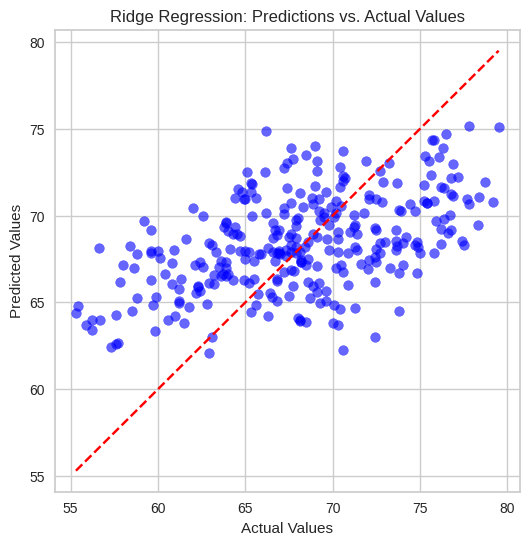

In [18]:
import matplotlib.pyplot as plt

# Plot predictions vs. actual values for each model
model_name = 'Ridge Regression'  # Replace with the desired model's name
model = models[model_name]

predictions = model.predict(X_test,)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title(f"{model_name}: Predictions vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# ***PLOT THE "ERROR"***

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.8919,21.9413,4.6842,0.1976,0.0692,0.0589
1,3.9687,20.6973,4.5494,0.2148,0.0668,0.0596
2,4.2091,24.7424,4.9742,0.1536,0.0711,0.0603
3,3.7614,21.3934,4.6253,0.2376,0.0690,0.0576
4,4.5587,25.9448,5.0936,0.2610,0.0744,0.0676
5,3.7782,20.1343,4.4871,0.0535,0.0653,0.0559
6,4.0373,22.9355,4.7891,0.2643,0.0691,0.0589
7,4.5549,27.2658,5.2217,0.1343,0.0781,0.0702
8,3.5058,17.7278,4.2104,0.0595,0.0604,0.0508


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

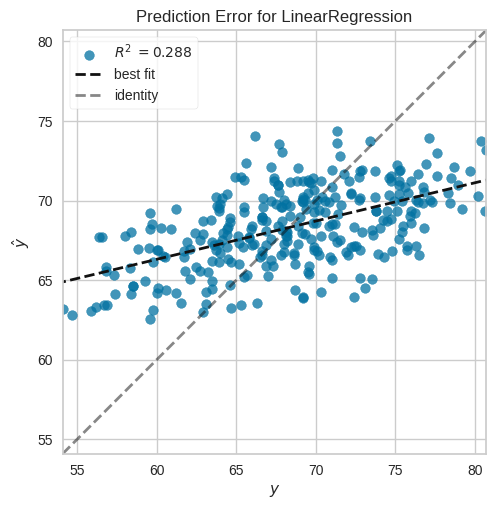

In [20]:
from pycaret.regression import create_model, plot_model


reg = create_model('lr')
plot_model(reg, plot='error')

# ***PLOT THE LEARNING CURVE***

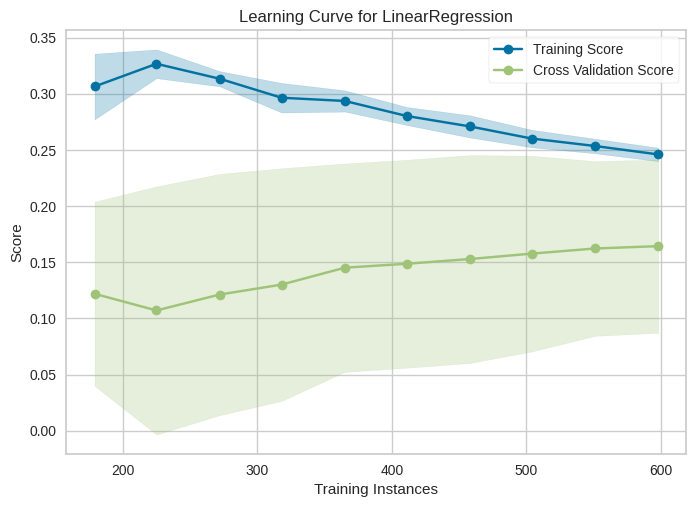

In [21]:
plot_model(reg, plot='learning')

# ***FEATURE IMPORTANCE***

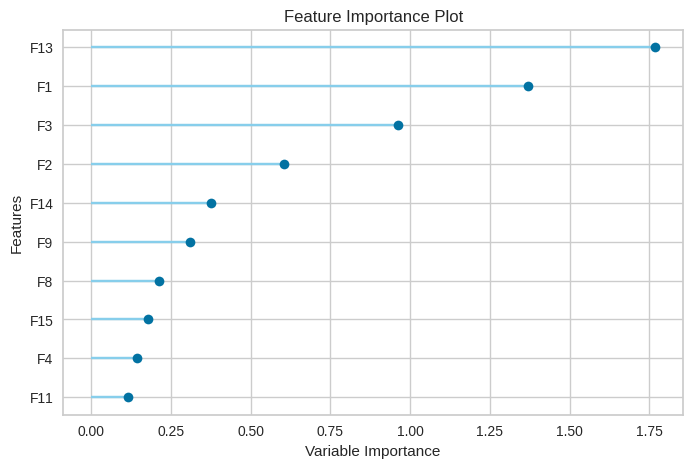

In [23]:
plot_model(reg, plot='feature')